# COVID-19 Python Data Analysis

## Part 1 - Introduction to the study

The COVID-19 virus shook the world by storm through its wildspread across all countries. In this projec, the covid-19 dataset as provided by the John Hopkins university is analysed and compared with the world happiness report datat to try and understand the correlations between different life factors.

Here I import the datasets, preprocess them and perform various data operations to arrive at the concludion. The visualization is also provided. The measure used in the analysis was the maximum one day change in the number of cases which corresponds to the maximum infection rate of the virus in said country.


## Part 2 - analyze COVID-19 Dataset

## Gather

In [154]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Assess

In [155]:
corona_data = pd.read_csv("covid_data.csv")
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 4/30/20
dtypes: float64(2), int64(100), object(2)
memory usage: 216.2+ KB


In [156]:
corona_data.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


## Clean

#### Remove column: Latitutude, Longitude not needed in this analysis

In [157]:
corona_data.drop(["Lat", "Long"], axis=1, inplace=True)

#### Group data by country

In [158]:
corona_data_group = corona_data.groupby("Country/Region").sum()

In [159]:
print("The dataset contains {0} rows and {1} columns".format(*corona_data_group.shape))
corona_data_group.head()


The dataset contains 187 rows and 100 columns


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Country Visualization

In [162]:
# Get country information
countries = list(corona_data_group.index)

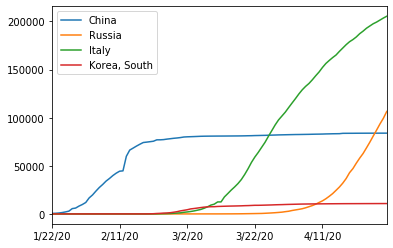

In [163]:
# Plot visualization
corona_data_group.loc["China"].plot()
corona_data_group.loc["Russia"].plot()
corona_data_group.loc["Italy"].plot()
corona_data_group.loc["Korea, South"].plot()
plt.legend()

### Evaluating the rate of covid-19 infection

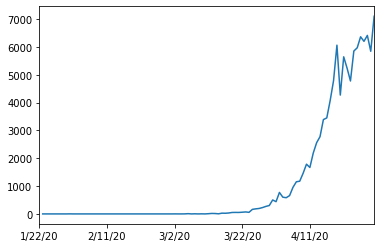

In [148]:
# Rate of change in corona cases daily
corona_data_group.loc['Russia'].diff().plot()

In [149]:
# Maximum rate of infection in 24 hours
Russia_max = corona_data_group.loc['Russia'].diff().max()
Italy_max = corona_data_group.loc['Italy'].diff().max()
China_max = corona_data_group.loc['China'].diff().max()
South_Korea_max = corona_data_group.loc['Korea, South'].diff().max()
print("The maximum number of infections in a 24 hours period is: \
{} cases for China, {} cases for Russia, {} cases for Italy and {} cases for South Korea" \
.format(China_max, Russia_max,Italy_max, South_Korea_max))
      

The maximum number of infections in a 24 hours period is: 15136.0 cases for China, 7099.0 cases for Russia, 6557.0 cases for Italy and 851.0 cases for South Korea


In [150]:
# Maximum infection rates for all countries in a 24 hours period

max_one_day_rate = []
for country in countries:
    max_one_day_rate.append(corona_data_group.loc[country].diff().max())
corona_data_group['max_infection_rate'] = max_one_day_rate

In [151]:
corona_data_group.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [152]:
# Copy dataframe with countries with their corressponding infection rate column

corona_infect_rate = pd.DataFrame(corona_data_group["max_infection_rate"])

## Part 3: Analyze world happiness report records

In [167]:
happy_data = pd.read_csv("worldwide_happiness_report.csv")
happy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [165]:
happy_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [168]:
happy = happy_data.drop([ "Generosity", "Perceptions of corruption", "Score"], axis=1)

In [169]:
happy.head()

,Overall rank,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,1,Finland,1.340,1.587,0.986,0.596
1,2,Denmark,1.383,1.573,0.996,0.592
2,3,Norway,1.488,1.582,1.028,0.603
3,4,Iceland,1.380,1.624,1.026,0.591
4,5,Netherlands,1.396,1.522,0.999,0.557


In [171]:
happy.set_index("Country or region", inplace = True)

### Join the two datasets

In [172]:
print("The corona infection rate dataset contains {0} rows and {1} columns".format(*corona_infect_rate.shape))
print("The happyness dataset contains {0} rows and {1} columns".format(*happy.shape))

The corona infection rate dataset contains 187 rows and 1 columns
The happyness dataset contains 156 rows and 5 columns


In [177]:
df = corona_infect_rate.join(happy, how='inner')

In [178]:
df.head()

,max_infection_rate,Overall rank,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,154,0.350,0.517,0.361,0.000
Albania,34.0,107,0.947,0.848,0.874,0.383
Algeria,199.0,88,1.002,1.160,0.785,0.086
Argentina,291.0,47,1.092,1.432,0.881,0.471
Armenia,134.0,116,0.850,1.055,0.815,0.283


### Correllation matrix

## Part 3: Compare infection rate with World Happiness Records

### Plot of Gross Domestic Product (GDP) vs Maximum Infection Rate (MIR) 

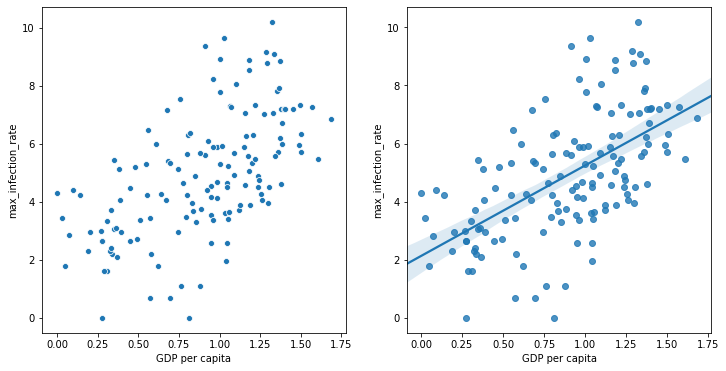

In [199]:
x = df["GDP per capita"]
y = df['max_infection_rate']

fig, ax =plt.subplots(1,2, figsize=(12, 6))
sns.scatterplot(x,np.log(y), ax=ax[0])
sns.regplot(x, np.log(y), ax=ax[1])


### Plot of Social support vs Maximum Infection Rate (MIR) 

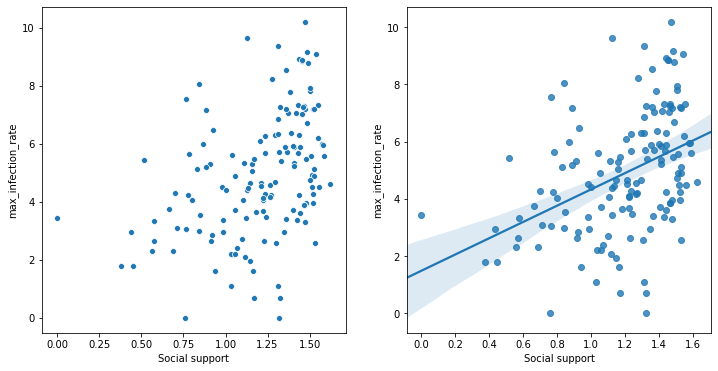

In [200]:
x = df["Social support"]
y = df['max_infection_rate']

fig, ax =plt.subplots(1,2, figsize=(12, 6))
sns.scatterplot(x,np.log(y), ax=ax[0])
sns.regplot(x, np.log(y), ax=ax[1])


### Plot of Healthy life expectancy vs Maximum Infection Rate (MIR) 

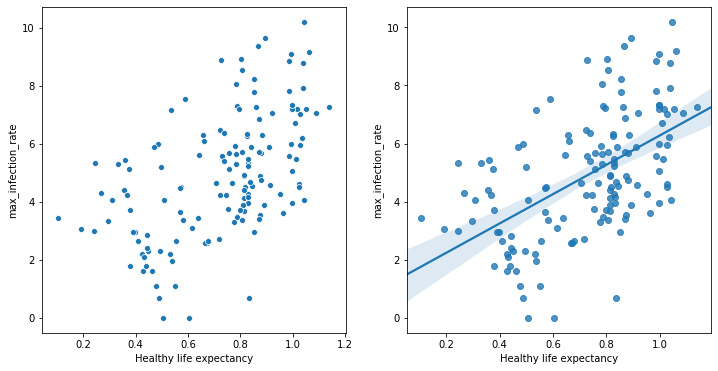

In [201]:
x = df["Healthy life expectancy"]
y = df['max_infection_rate']

fig, ax =plt.subplots(1,2, figsize=(12, 6))
sns.scatterplot(x,np.log(y), ax=ax[0])
sns.regplot(x, np.log(y), ax=ax[1])


### Plot of Freedom to make life choices vs Maximum Infection Rate (MIR) 


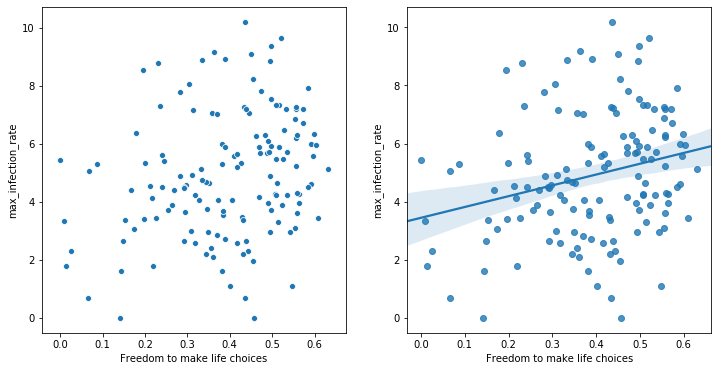

In [202]:
x = df["Freedom to make life choices"]
y = df['max_infection_rate']

fig, ax =plt.subplots(1,2, figsize=(12, 6))
sns.scatterplot(x,np.log(y), ax=ax[0])
sns.regplot(x, np.log(y), ax=ax[1])
